# Imports and configuration

In [2]:
# This notebook was developed by Jocelyn Read jread@fullerton.edu to work with the igwn distribution and Python 3.10.2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy.cosmology import z_at_value

from scipy import interpolate
import scipy.integrate as integrate

import matplotlib

#plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 18,  'mathtext.fontset': 'stix'})
matplotlib.rcParams['figure.figsize'] = (12., 8.0)
matplotlib.rcParams['xtick.labelsize'] = 16.0
matplotlib.rcParams['ytick.labelsize'] = 16.0
matplotlib.rcParams['axes.labelsize'] = 20.0
matplotlib.rcParams['axes.grid'] = True 

In [4]:
colorlist = list( matplotlib.colors.TABLEAU_COLORS.keys())
colorlist[0]

'tab:blue'

In this document, we explore the scaling of reference science metrics with the geometry of a new facility, when a detector is added to an existing network of comparable sensitivity. 
The goal is to determine the appropriate power $\alpha$ of a scaling relationship of the form $[\text{science}]\propto L^\alpha$ for armlength $L$. 

This scaling relationship is desired to allow comparison between different interferometer geometry proposals: for example, if a proposed $XG$ site geometry has 1.5$\times$ another's armlength, how much ``better'' will the resulting XG network be? A simple scaling metric can be used to quickly evaluate cost tradeoffs for variant scenarios.

The relevant characteristic of the facility is for a two-arm detector the quantity $L \sin \theta$, with $L$ the armlength and $\theta$ the opening angle.
The primary impact of this characteristic is to change in the observatory's recorded signal amplitude for a given source.
\begin{equation}
A(f) \propto \frac{D_0}{D_L}\frac{L \sin \theta}{4 \text{km}} A_0(f)
\end{equation}


For a fixed source, this means a larger signal to noise ratio (SNR): $\rho \propto A$. Science metrics we consider here:

* SNR of fixed source - inversely proportional to measurement error for that source.
* Number of sources with a given loud SNR (sensitive volume in the nearby universe assuming uniform distribution).
* Redshift of most distant observable binary black hole: $z(D_{H})$ with BBH horizon distance $D_{H}$. Roughly scales like $D_{H} \propto \rho_\text{fixed}$
* Total sensitive time-volume of BBH within that horizon. 
* Redshift of most distant observable binary neutron star: $z(D_{H})$ with BNS horizon distance $D_{H}$. Roughly scales like $D_{H} \propto \rho_\text{fixed}$
* Total sensitive time-volume of BNS within that horizon


For each of the metrics listed above, the relevant SNR is the standard integrated ratio of the expected signal amplitude squared to the power spectral density of noise in the interferometer over all frequencies, but a similar quantity can be constructed for specific measurement goals.

For each of these categories, we will look at the change in the metric described and fit that difference to a power-law scaling with the length of the new facility. For example, for the SNR of a fixed source, we write  $\Delta \rho = \rho - \rho_0 \propto L_{new}^\alpha$ and fit for the coefficient $\alpha$ for the specific initial network $\rho_0$ and the total $\rho$ after adding a new interferometer with length $L_\text{new}$.

Detectors  will also have a source-specific factor $F$ which depends on how well the frequencies containing signal information are measured by the instrumentation installed in the observatory, such that
\begin{align} 
\frac{\rho_\text{target}}{\rho_{0,\text{target}}} = F \frac{D_0}{D}\frac{L \sin \theta}{4 \text{km}}
\end{align}


# Context for new detector impact


Premise: Each component observatory will contribute to the total SNR of the signal in the detector network in quadrature.
Therefore, impact from a new detector with signal SNR $\rho$ is:
\begin{align}
 \Delta \rho = \sqrt{\rho_0^2+\rho^2}- \rho_0
\end{align}

If $\rho_0 \ll \rho_\text{new}$, network contribution $\simeq \rho_\text{new} - \rho_0$. If $\rho_0 > \rho_\text{new}$, network contribution $\simeq \frac{1}{2} \rho_\text{new}^2 / \rho_0$.

#Plots demonstrating $\rho_0$ impact on SNR change

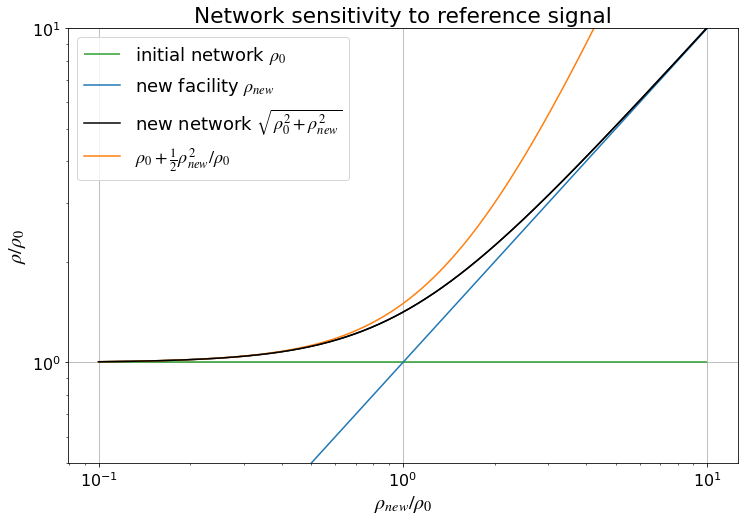

In [5]:
# baseline network
rho0 = 1
# new detector
rho = np.linspace(0.1,10,1000)
# impact on network sensitivity
newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2) ) 
deltarho = np.sqrt(np.power(rho0,2)+ np.power(rho,2) ) - rho0
plt.title(r'Network sensitivity to reference signal')
plt.hlines(rho0,.1,10,color='tab:green',label = r'initial network $\rho_0$')
plt.loglog(rho, rho, label = r'new facility $\rho_{new}$')
plt.loglog(rho, newnet, label = r'new network $\sqrt{\rho_0^2 +\rho_{new}^2}$', color='black')
plt.loglog(rho, rho0 + np.power(rho,2)/ rho0 /2, label = r'$\rho_0 + \frac{1}{2}\rho_{new}^2/\rho_0$')
plt.loglog(rho, newnet,  color='black')
plt.xlabel(r'$\rho_{new}/\rho_0$')
plt.ylabel(r'$\rho / \rho_0$')
plt.ylim(.5,10)
plt.legend()
plt.savefig('network-sensitivity-rho0', bbox_inches='tight')

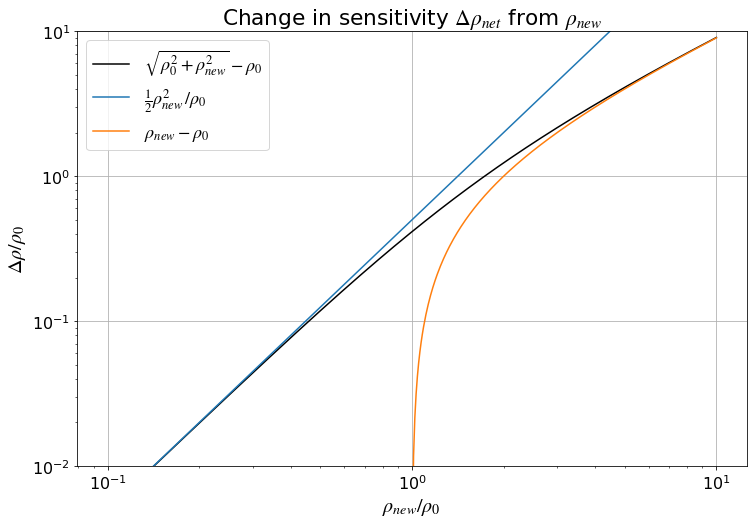

In [6]:
plt.title(r'Change in sensitivity $\Delta \rho_{net}$ from $\rho_{new}$')
plt.loglog(rho, deltarho, label = r'$\sqrt{\rho_0^2 +\rho_{new}^2} - \rho_0$',color='black')
plt.plot(rho, np.power(rho,2)/rho0/2., label = r'$\frac{1}{2} \rho_{new}^2  \, /\rho_0$')
plt.plot(rho, rho-rho0, label = r'$\rho_{new} - \rho_0$')
plt.xlabel(r'$\rho_{new} / \rho_0$ ')
plt.ylabel(r'$\Delta \rho / \rho_0$')
plt.ylim(0.01,10)
plt.legend()
plt.savefig('network-sensitivity-delta-rho0', bbox_inches='tight')

# Impact of new detector on fiducial signal SNR


We focus the scaling estimates on candidate configurations with $L_\text{new}\sin \theta_\text{new}$ that range from $ (3 - 6)L_{LIGO}$ are being considered.
They are being added to a network of two other detectors of comparable strength; this means we expect $\rho_0 = \sqrt{2} \rho_\text{new}$



In [7]:
rho = np.linspace(4,6,100) # Range of candidate additions in LHOs
refname = "LIGO"

In [8]:
print('2 detectors: ' , np.sqrt(2) * rho[[0,50,-1]]) # network with two other detectors of comparable strength, lower/mid/upper range
print('3 detectors: ' , np.sqrt(3) * rho[[0,50,-1]]) # network with two other detectors of comparable strength, lower/mid/upper range

2 detectors:  [5.65685425 7.0853528  8.48528137]
3 detectors:  [ 6.92820323  8.6777495  10.39230485]


 So $\rho_0 \simeq ( 5.7-8.5) \rho_{LIGO}$. 

We measure results here in "LIGOs." However, an XG facility of the same length will tend to have larger SNR due to wider sensitive band.  We scale the resulting SNR of the XG observatory network by a phenomenological amplitude factor $F$.  This $F$ factor is source-specific, and is approximated here as a fixed value based on existing horizon changes.
If $F=1$, then $\rho/\rho_{LIGO} = L/L_{LIGO}$. 


It is straightforward to re-check these constants for other ranges of $\rho_\text{new}$ and $\rho_0$, or to modify the reference values for the estimate of $F$.

In [9]:
starting_network = [5,7,9]


Nearby signals: These results ``in LIGO'' scale directly with $F$, so we take $F=1$. 


Science metric: Change in signal-to-noise for a fixed signal. 

New network sensitivity $\Delta \rho = \sqrt{\rho_0^2 +\rho_{new}^2} - \rho_0$ in LIGOs. These would scale also with $F$.

This scaling is shown in Figure \ref{fig:delta-network-snr}. It should apply to most sources (not only transients).



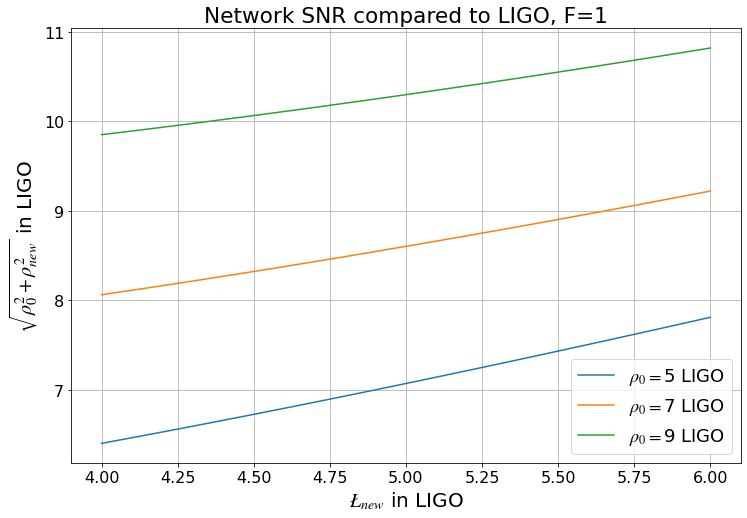

In [10]:
fig,ax = plt.subplots()
plt.title('Network SNR compared to '+refname+', F=1')
plt.ylabel(r'$\sqrt{\rho_0^2 +\rho_{new}^2}$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)

for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) 

  plt.plot(rho,newnet, 
           label = r'$\rho_0=$'+str(rho0)+" "+refname,
           color = colorlist[i])

ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('network-snr',bbox_inches='tight')

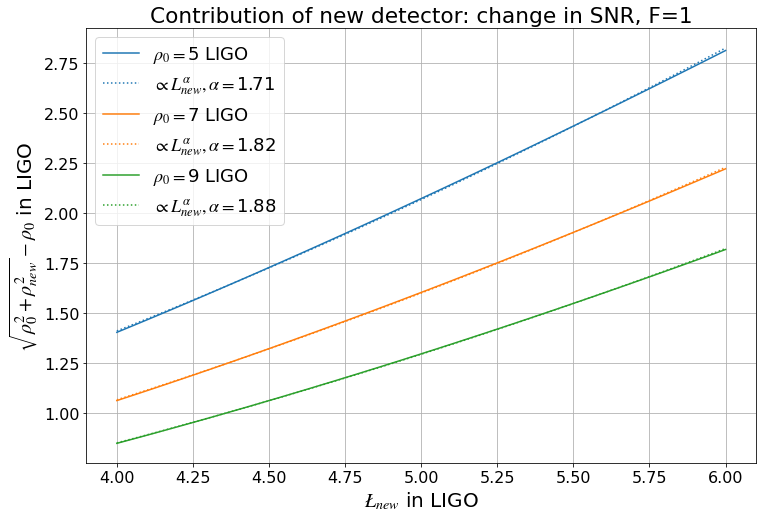

In [11]:
fig,ax = plt.subplots()
plt.title('Contribution of new detector: change in SNR, F=1')
plt.ylabel(r'$\sqrt{\rho_0^2 +\rho_{new}^2} - \rho_0$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)

for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) 
  metric = newnet - rho0

  plt.plot(rho,metric, 
           label = r'$\rho_0=$'+str(rho0)+" "+refname,
           color = colorlist[i])

  # Scales like rho_new^2 for rho_new << rho_0
  # plt.plot(rho, 0.5*rho*rho / rho0, linestyle='dotted', color=colorlist[i])

  # Linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(metric), 1)

  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),
         linestyle='dotted', color = colorlist[i])
lgd=ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-network-snr',bbox_extra_artists=(lgd,), bbox_inches='tight')

What is the impact of a given change $\Delta \rho_\text{net}$ in network sensitivity on science goals?

For a given signal, our new network records improved signal strength $\rho_{net}$

This translates to measurement improvements: source properties are recovered with variances $\sigma^2 \propto 1/ \rho_{net}^2$

With a joint detection threshold, the increase in network SNR for each signal
means a larger horizon: $D_{H} \propto \rho_{net}$


# Impact of new detector on number of loud signals

Science metric: Number of loud signals

The metric for some population-level science goals will be proportional to number of signals observed with network SNR above a fiducial value, where signals are in nearby universe (see cosmology below for limitations of this scaling). 
So we expect
$N_0 \propto V_0 \propto A_0^3 \propto \rho_0^3$. 
Write resulting change $V - V_0$ in units of $V_{LIGO}$. These would scale also with $F^3$.

This metric would apply to sources with uniform volumetric distribution in the relevant distance range.


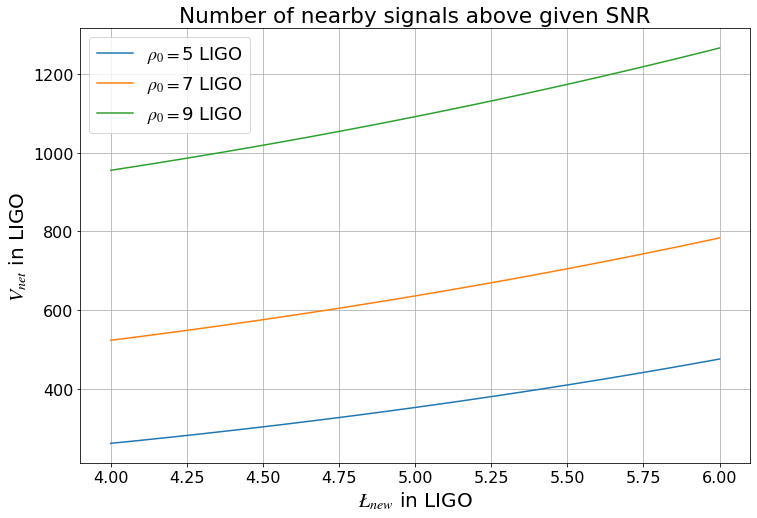

In [12]:
fig,ax = plt.subplots()
plt.title('Number of nearby signals above given SNR')
plt.ylabel(r'$V_{net}$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  vol0 = np.power(rho0,3) # in units of LHO
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) # in units of LHO
  newvol = np.power(newnet,3) # in units of LHO
  plt.plot(rho,newvol, 
           label = r'$\rho_0=$'+str(rho0)+" "+refname,
           color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('nearby-signals', bbox_inches='tight')

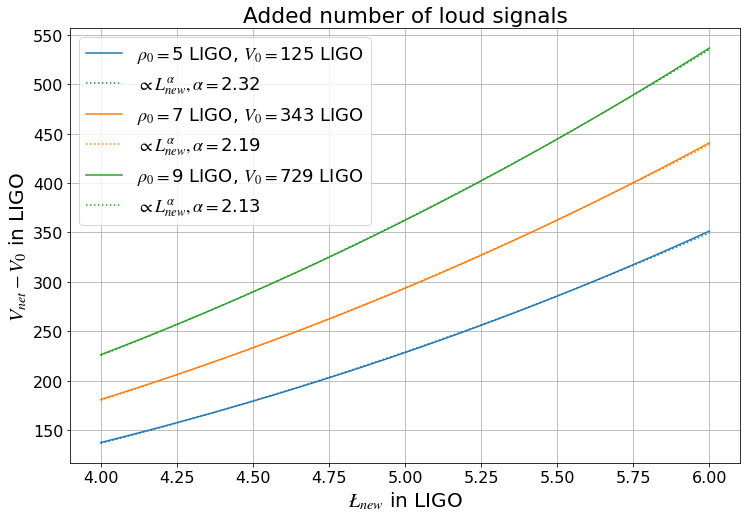

In [13]:
fig,ax = plt.subplots()
plt.title('Added number of loud signals')
plt.ylabel(r'$V_{net} - V_0$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  vol0 = np.power(rho0,3) # in units of LHO
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) # in units of LHO
  newvol = np.power(newnet,3) # in units of LHO
  plt.plot(rho,newvol - vol0, 
           label = r'$\rho_0=$'+str(rho0)+" "+refname+r', $V_0=$'+str(vol0)+" "+refname,
           color = colorlist[i])
  # Linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(newvol - vol0),1)
  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),
         linestyle='dotted', color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-nearby-signals', bbox_inches='tight')

# Cosmological horizons in distance and impact on sensitive volume


The total volume of universe that the observatory can observe can be found by integrating differential comoving volume $ dV_c / d z$ versus redshift $z$ out to thehorizon redshift $z_H$.
The rate of events must also be scaled from a local comoving rate $\dot{n}$  to the rate in the observer frame.
This gives total observed event rates $\propto$ local rate $\times$ differential volume $\times$ inverse scale factor $\times$ detection probability[\url{https://arxiv.org/abs/1904.10976}]

\begin{align}
R_D(z) = \frac{dV_c}{dZ}\frac{\dot{n}}{1+z}P_{det}(z)
\end{align}


We assume a instant-off threshold for $P_{det}(z)$ at the the horizon redshift $z(D_H)$, and define $VT$ to scale like the observe rate if there was a constant comoving rate $\dot{n}$. 
The $VT$ as a function of $D_H$ is therefore given by integrating differential comoving volume  divided by $1+z$ out to redshift $z(D_H)$. For nearby sources, this is as above $\propto D_H^3$. However, for cosmological distances this scaling breaks down, as shown in Figure \ref{fig:VT-not-cubic}.

Since the scaling depends on the horizon, we need to map between the length scale of the proposed facility under consideration. This requires a more concrete estimate for the $F$ above.  

For the reference sources here, we estimate the frequency factor $F$ from prior results for the horizon distance of different observatories,
We use Cosmic Explorer (CE) in the horizon study as the representative instrumental configuration comparable to LIGO,
a detector length of $10 L_{LIGO}$
should give the horizon improvement from A+ to CE in horizon study, from $z_{APLUS}$ to $z_{CE}$

If we estimate the improvement in horizon purely from length scaling we expect $10 L_{LIGO}$ to give a horizon luminosity distance of $10 D_{H,LIGO}$. We set $F$ so that
$ z(F \times 10 D_{H,LIGO}) = z_{CE}$.

For sources at cosmological distance, the $F$ will change slightly across the range of candidate $L_\text{new}$ due to varying the redshift of the horizon source signal. We neglect this effect in this version of the scaling estimate and hold $F$ constant across proposed XG facilities.


In [14]:
# Set up cosmological properties
redshift_basevals = np.logspace(-2,2,100) 

# documentation of these are at e.g. 
# https://docs.astropy.org/en/stable/api/astropy.cosmology.FLRW.html#astropy.cosmology.FLRW.comoving_volume
lumdist_basevals = cosmo.luminosity_distance(redshift_basevals).value # use .value to strip of astropy units for plotting
scale_factor_basevals = cosmo.scale_factor(redshift_basevals) # needed if we want to apply local rates because TIME IS WIBBLY WOBBLY TOO
diff_Vc_basevals = 4.0 * np.pi * cosmo.differential_comoving_volume(redshift_basevals).value # differential volume: added volume per unit z
vol_basevals = cosmo.comoving_volume(redshift_basevals).value  #volume inside redshifts

# Recommended reference for distance measures etc https://arxiv.org/abs/astro-ph/9905116 

def lum_to_z(x):
    return np.interp(x,lumdist_basevals,redshift_basevals)

def z_to_lum(x):
  # the left and right extension allows this to be used for secondary axis plotting
    return np.interp(x,redshift_basevals,lumdist_basevals,left=redshift_basevals[0]/10,right=lumdist_basevals[-1]*10)

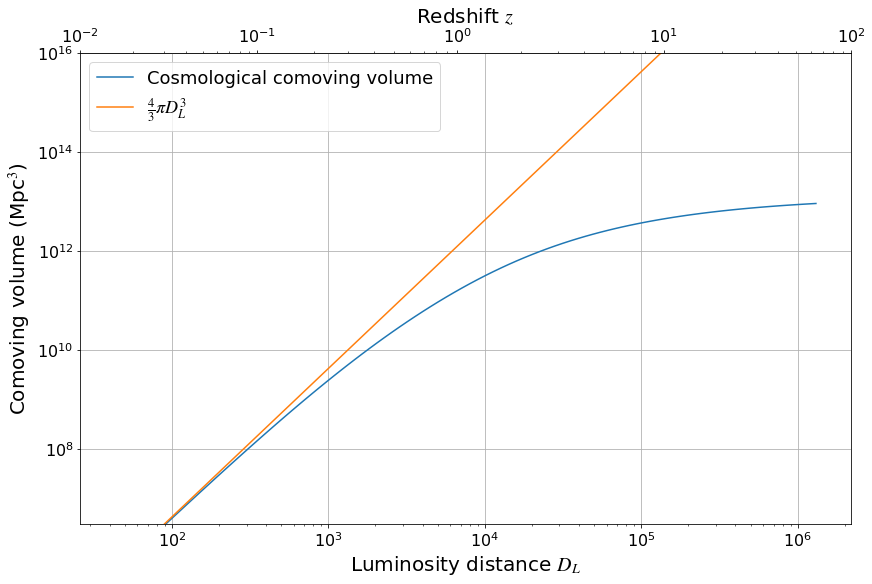

In [15]:
fig, ax = plt.subplots(layout='constrained')
plt.loglog(lumdist_basevals,vol_basevals, label = 'Cosmological comoving volume')
plt.loglog(lumdist_basevals, 4.0 / 3 * np.pi * np.power(lumdist_basevals,3), label = r'$\frac{4}{3} \pi D_L^3$')
plt.xlabel("Luminosity distance $D_{L}$")
plt.ylabel("Comoving volume (Mpc$^3$)")
plt.ylim(3e6, 1e16)
secax = ax.secondary_xaxis('top', functions=(lum_to_z, z_to_lum))
secax.set_xlabel('Redshift $z$')
plt.legend()
#plt.title( 'Where will the cube scaling for V break down?')



Text(0.5, 1.0, 'Check: integrate V')

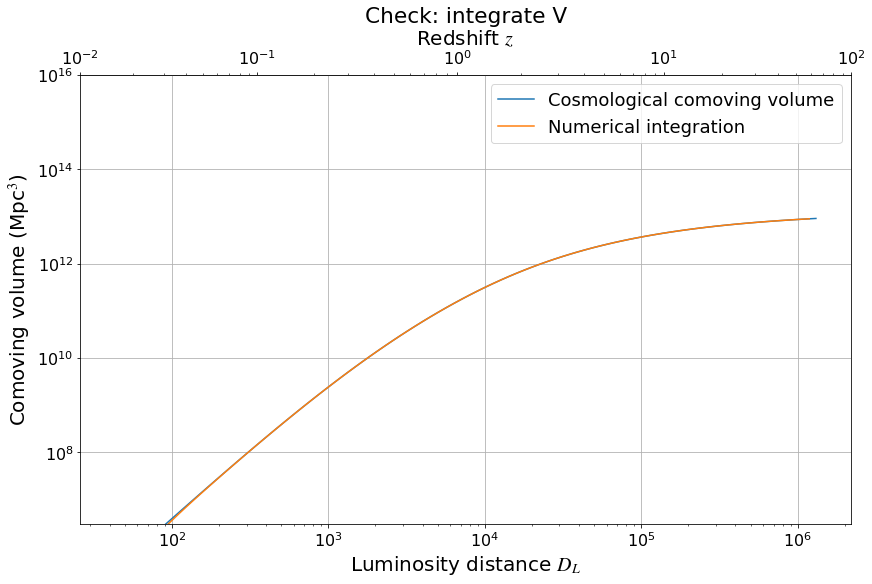

In [16]:
fig, ax = plt.subplots(layout='constrained')
plt.loglog(lumdist_basevals,vol_basevals, label = 'Cosmological comoving volume')
integrated_volume = [integrate.simpson(diff_Vc_basevals[:i+1], redshift_basevals[:i+1]) for i in range(len(redshift_basevals)-1)]
plt.loglog(lumdist_basevals[:-1],integrated_volume, label = 'Numerical integration')
plt.xlabel("Luminosity distance $D_{L}$")
plt.ylabel("Comoving volume (Mpc$^3$)")
plt.ylim(3e6, 1e16)
secax = ax.secondary_xaxis('top', functions=(lum_to_z, z_to_lum))
secax.set_xlabel('Redshift $z$')
plt.legend()
plt.title( 'Check: integrate V')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


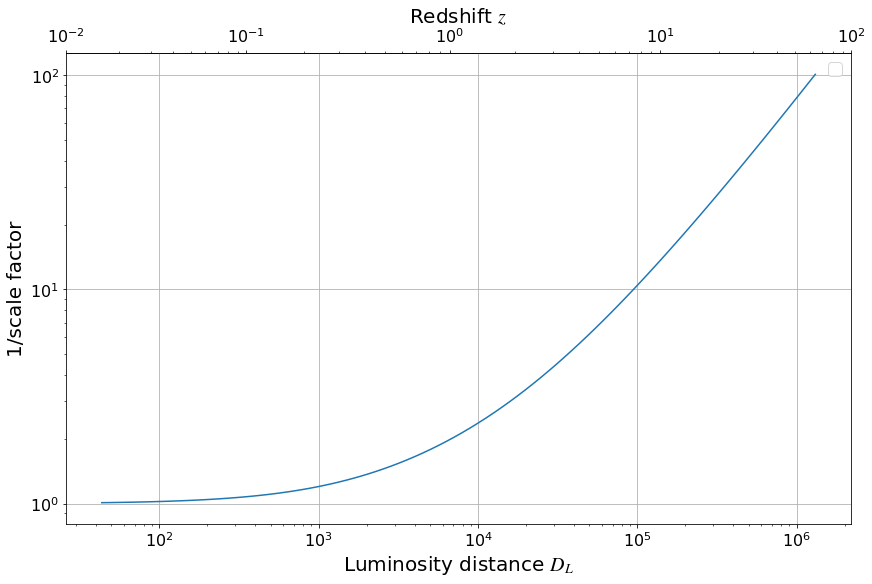

In [17]:
# where will the N~V scaling break down?
fig, ax = plt.subplots(layout='constrained')
plt.loglog(lumdist_basevals,1/scale_factor_basevals, label = r'')
plt.xlabel("Luminosity distance $D_{L}$")
plt.ylabel("1/scale factor")

secax = ax.secondary_xaxis('top', functions=(lum_to_z, z_to_lum))
secax.set_xlabel('Redshift $z$')
plt.legend()

In [18]:
# Calculate the integrated VT

VT_of_redshift = [integrate.simpson(diff_Vc_basevals[:i+1]/scale_factor_basevals[:i+1], redshift_basevals[:i+1]) for i in range(len(redshift_basevals)-1)]


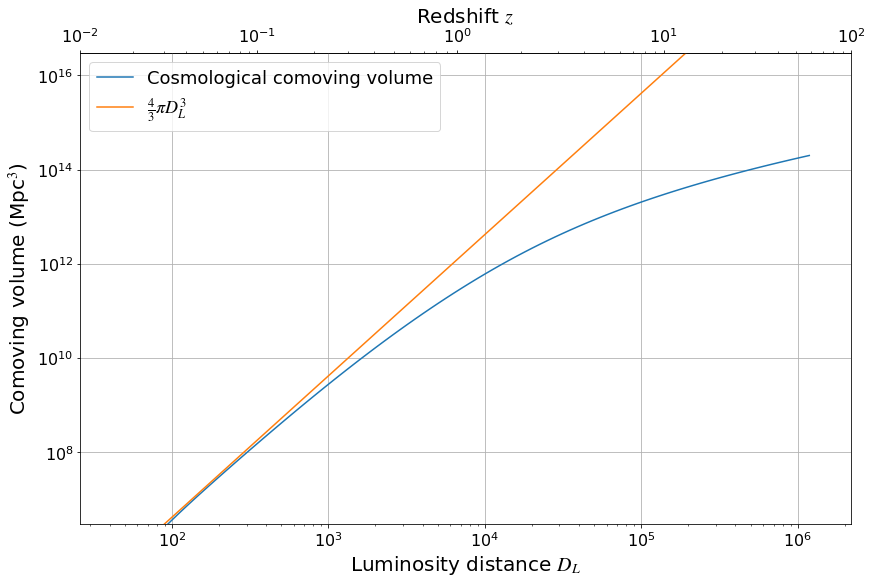

In [19]:
fig, ax = plt.subplots(layout='constrained')
plt.loglog(lumdist_basevals[:-1],VT_of_redshift, label = 'Cosmological comoving volume')
plt.loglog(lumdist_basevals, 4.0 / 3 * np.pi * np.power(lumdist_basevals,3), label = r'$\frac{4}{3} \pi D_L^3$')
plt.xlabel("Luminosity distance $D_{L}$")
plt.ylabel("Comoving volume (Mpc$^3$)")
plt.ylim(3e6, 3e16)
secax = ax.secondary_xaxis('top', functions=(lum_to_z, z_to_lum))
secax.set_xlabel('Redshift $z$')
plt.legend()
#plt.title( 'Where will the cube scaling for VT break down?')
plt.savefig('VT-not-cubic', bbox_inches='tight')

# Candidate metric: BBH horizon and total numbers

Metrics: Horizon for BBH, cosmological $VT$ for BBH.

Relevant amplitude-only scaling for the horizon (redshift of furthest signal) for BBH, and the integrated volume-time $VT$ for all BBH. 

Specifically we pick a 30-30 $M_\odot$ BBH as reference and  estimate the  horizon change from APLUS at $z_H=1.5$ to CE at $z_H=60$. This gives $F\simeq 4$.

Since $z \sim D_L$, the horizon distance scales similarly to the $SNR$ of a reference signal. The change in horizon scales much like the fiducial signal SNR.

Since the accumulation of $VT$ is slower with $z$ in the early universe, the sensitive volume for BBH scales at a lower power with $L_\text{new}$ compared to $VT$ in the local universe.



In [20]:
# define metric in terms of a A+ source that reaches cosmological distances (like BBH)
redshift_LHO = 2.0
sourceclass = "BBH"
lumdist_LHO = np.interp(redshift_LHO,redshift_basevals,lumdist_basevals)
volume_LHO = np.interp(redshift_LHO,redshift_basevals,vol_basevals)
scale_factor_LHO = np.interp(redshift_LHO,redshift_basevals,scale_factor_basevals)
print(lumdist_LHO, volume_LHO, scale_factor_LHO)

horizon_with_no_F = np.interp(10 * lumdist_LHO,lumdist_basevals,redshift_basevals) 

print('Horizon with straight 10x scaling' , horizon_with_no_F)
print('Needed F' , 60/horizon_with_no_F)

15875.944972623012 620749258021.3617 0.33339448734002486
Horizon with straight 10x scaling 14.239174328900301
Needed F 4.213727468609048


Frequency-dependent factor for BBH F ~ 4

In [21]:
Ffac = 4

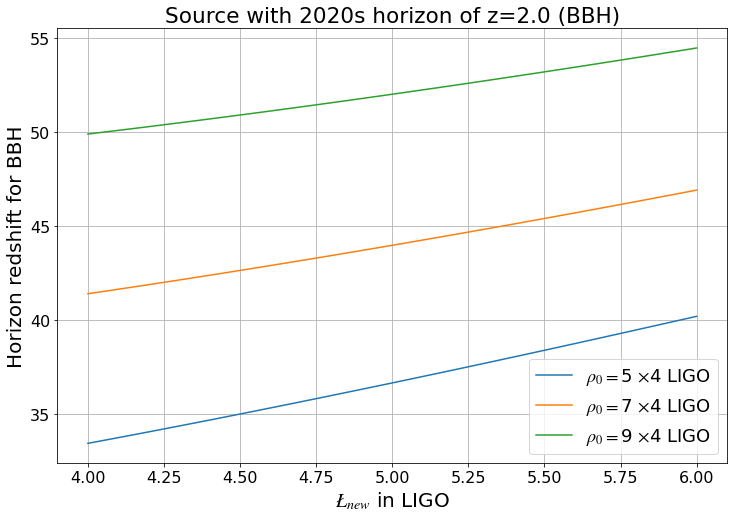

In [22]:
fig,ax = plt.subplots()
plt.title("Source with 2020s horizon of z="+str(redshift_LHO)+" ("+sourceclass+")")
plt.ylabel(r'Horizon redshift for '+sourceclass)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  redshifts = np.interp(lumdists,lumdist_basevals,redshift_basevals)
  redshift0 = np.interp(lumdist0,lumdist_basevals,redshift_basevals)
  plt.plot(rho,redshifts, 
           label = r'$\rho_0=$'+str(rho0)+" "+r'$\times$'+str(Ffac)+" "+refname)

ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('BBH-horizon', bbox_inches='tight')

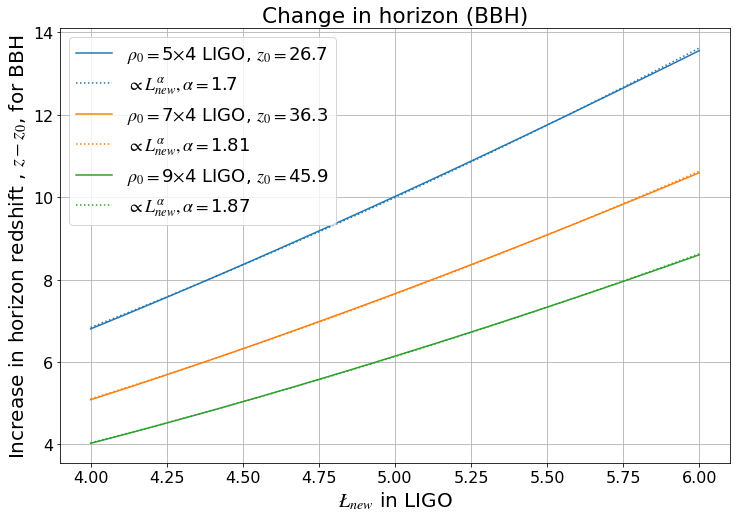

In [23]:
fig,ax = plt.subplots()
plt.title("Change in horizon ("+sourceclass+")")
plt.ylabel(r'Increase in horizon redshift , $z - z_0$, for '+sourceclass)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  redshifts = np.interp(lumdists,lumdist_basevals,redshift_basevals)
  redshift0 = np.interp(lumdist0,lumdist_basevals,redshift_basevals)
  plt.plot(rho,redshifts - redshift0, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname+r', $z_0=$'+str(np.round(redshift0,1)),color = colorlist[i])
  # Linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(redshifts-redshift0), 1)
  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),linestyle='dotted', color = colorlist[i])

ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-BBH-horizon', bbox_inches='tight')

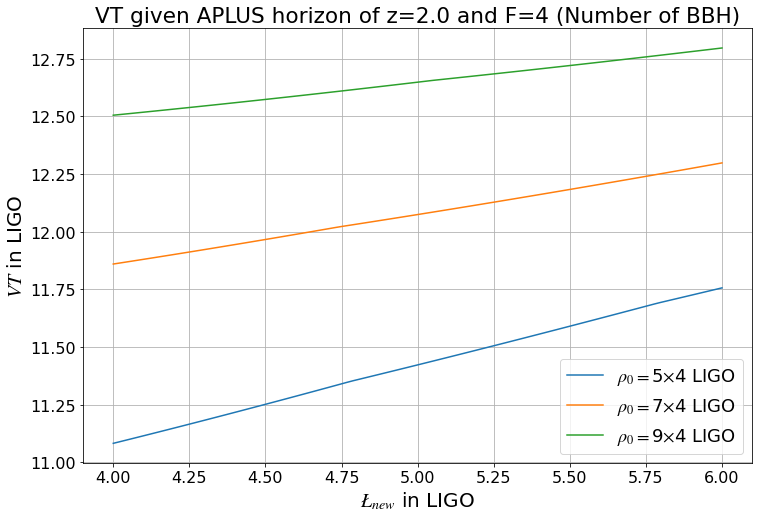

In [24]:
fig,ax = plt.subplots()
plt.title("VT given APLUS horizon of z="+str(redshift_LHO)+" and F="+str(Ffac)+" (Number of "+sourceclass+")")
plt.ylabel(r'$VT$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  volume = np.interp(lumdists,lumdist_basevals,vol_basevals) / volume_LHO
  volume0 = np.interp(lumdist0,lumdist_basevals,vol_basevals) / volume_LHO
  plt.plot(rho,volume, 

           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname,
           color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('BBH-VT', bbox_inches='tight')

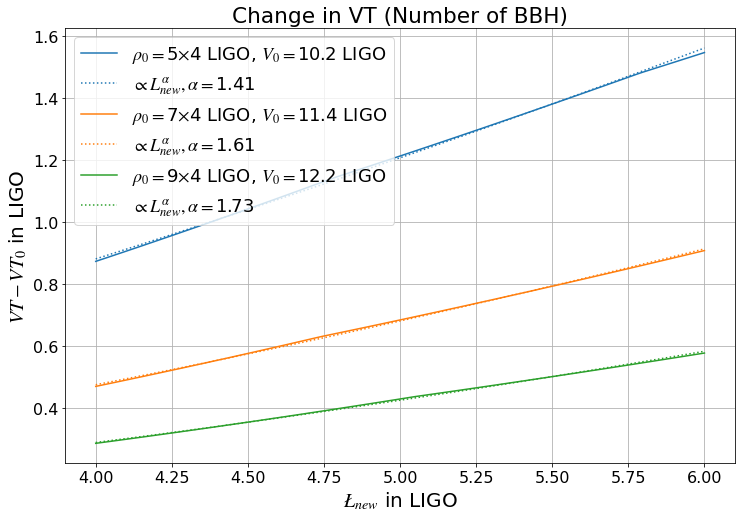

In [25]:
fig,ax = plt.subplots()
plt.title("Change in VT (Number of "+sourceclass+")")
plt.ylabel(r'$VT-VT_0$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  volume = np.interp(lumdists,lumdist_basevals,vol_basevals) / volume_LHO
  volume0 = np.interp(lumdist0,lumdist_basevals,vol_basevals) / volume_LHO
  plt.plot(rho,volume -volume0, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname+r', $V_0=$'+str(np.round(volume0,1))+" "+refname,
           color = colorlist[i])
  #linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(volume -volume0), 1)
  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),
         linestyle='dotted', color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-BBH-VT', bbox_inches='tight')

#Candidate metric: BNS range and number

Metrics: Horizon for BNS, cosmological $VT$ for BNS.

Relevant amplitude-only scaling for the horizon (redshift of furthest signal) for BBH, and the integrated volume-time $VT$ for all BBH. 

Specifically we pick a 1.4-1.4$M_\odot$ BBH as reference and  estimate the  horizon change from APLUS at $z_H=0.1$ to CE at $z_H=3$. This gives $F\simeq 4$.

Since $z \sim D_L$, the horizon distance scales similarly to the $SNR$ of a reference signal. The change in horizon scales much like the fiducial signal SNR.

Since the accumulation of $VT$ at cosmological distances is moderately slower than the local universe, so the sensitive volume for BNS scales at a moderately lower power with $L_\text{new}$ compared to $VT$ in the local universe.

In [26]:
# define metric in terms of a A+ source at moderate redshift
redshift_LHO = 0.1
sourceclass = "BNS"
lumdist_LHO = np.interp(redshift_LHO,redshift_basevals,lumdist_basevals)
volume_LHO = np.interp(redshift_LHO,redshift_basevals,vol_basevals)

horizon_with_no_F = np.interp(10 * lumdist_LHO,lumdist_basevals,redshift_basevals) 

print('Horizon with straight 10x scaling' , horizon_with_no_F)
print('Needed F' , 3 /horizon_with_no_F)

Horizon with straight 10x scaling 0.7422903282512174
Needed F 4.041545317002559


In [27]:
Ffac=4

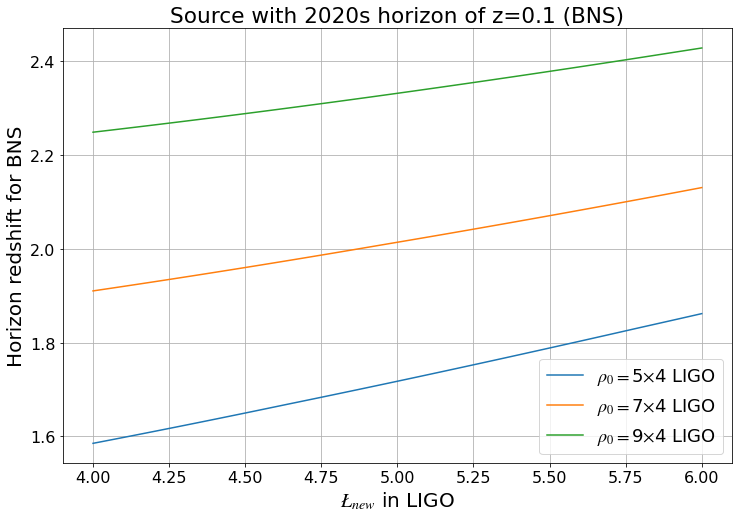

In [28]:
fig,ax = plt.subplots()
plt.title("Source with 2020s horizon of z="+str(redshift_LHO)+" ("+sourceclass+")")
plt.ylabel(r'Horizon redshift for '+sourceclass)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  redshifts = np.interp(lumdists,lumdist_basevals,redshift_basevals)
  redshift0 = np.interp(lumdist0,lumdist_basevals,redshift_basevals)
  plt.plot(rho,redshifts, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname)

ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('BNS-horizon', bbox_inches='tight')

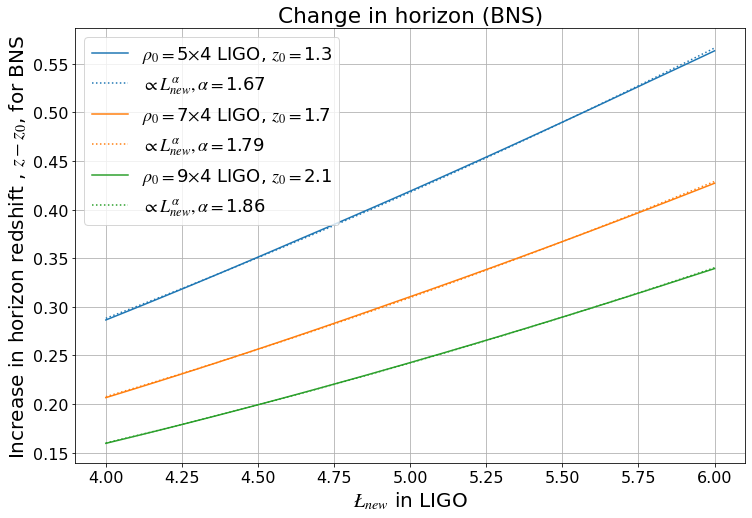

In [30]:
fig,ax = plt.subplots()
plt.title("Change in horizon ("+sourceclass+")")
plt.ylabel(r'Increase in horizon redshift , $z - z_0$, for '+sourceclass)
plt.xlabel(r'$\L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  redshifts = np.interp(lumdists,lumdist_basevals,redshift_basevals)
  redshift0 = np.interp(lumdist0,lumdist_basevals,redshift_basevals)
  plt.plot(rho,redshifts - redshift0, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname+r', $z_0=$'+str(np.round(redshift0,1)),color = colorlist[i])
  # Linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(redshifts-redshift0), 1)
  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),linestyle='dotted', color = colorlist[i])

ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-BNS-horizon',bbox_inches='tight')

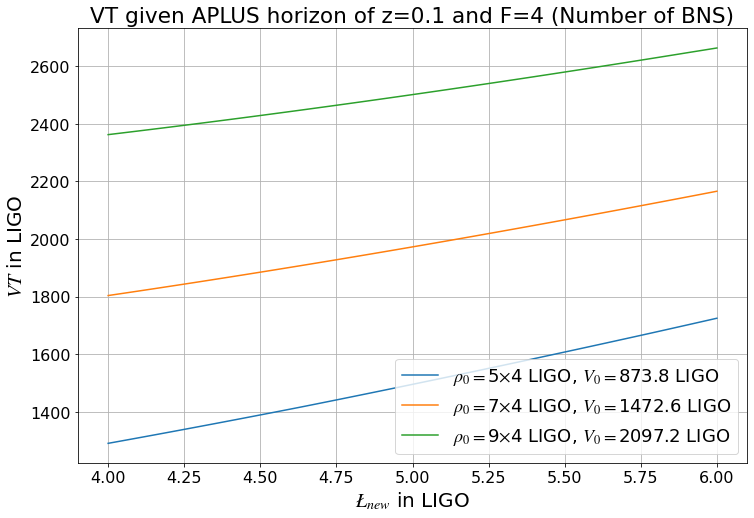

In [32]:
fig,ax = plt.subplots()
plt.title("VT given APLUS horizon of z="+str(redshift_LHO)+" and F="+str(Ffac)+" (Number of "+sourceclass+")")
plt.ylabel(r'$VT$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  volume = np.interp(lumdists,lumdist_basevals,vol_basevals) / volume_LHO
  volume0 = np.interp(lumdist0,lumdist_basevals,vol_basevals) / volume_LHO
  plt.plot(rho,volume, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname+r', $V_0=$'+str(np.round(volume0,1))+" "+refname,
           color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('BNS-VT',bbox_inches='tight')

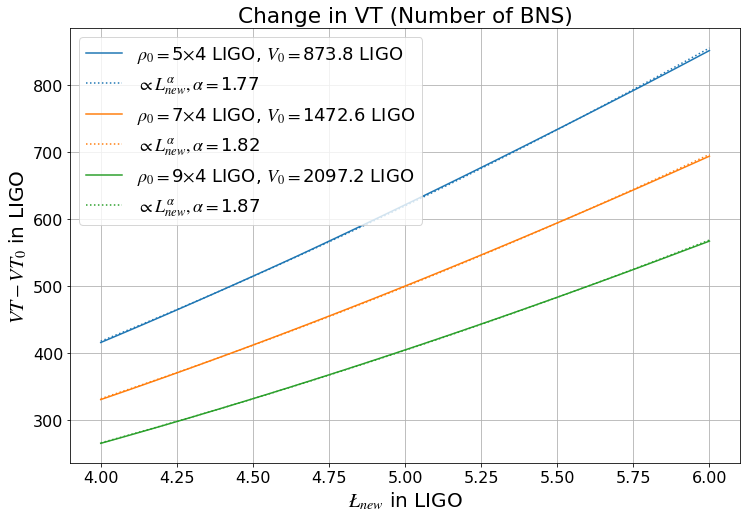

In [31]:
fig,ax = plt.subplots()
plt.title("Change in VT (Number of "+sourceclass+")")
plt.ylabel(r'$VT-VT_0$ in '+refname)
plt.xlabel(r'$L_{new}$ in '+refname)
for i, rho0 in enumerate(starting_network):
  newnet = np.sqrt(np.power(rho0,2)+ np.power(rho,2)) #New network in LHOs 
  lumdists = Ffac* lumdist_LHO * newnet # horizon distance scales with luminosity
  lumdist0 = Ffac* lumdist_LHO * rho0 # horizon distance scales with luminosity
  volume = np.interp(lumdists,lumdist_basevals,vol_basevals) / volume_LHO
  volume0 = np.interp(lumdist0,lumdist_basevals,vol_basevals) / volume_LHO
  plt.plot(rho,volume -volume0, 
           label = r'$\rho_0=$'+str(rho0)+r'$\times$'+str(Ffac)+" "+refname+r', $V_0=$'+str(np.round(volume0,1))+" "+refname,
           color = colorlist[i])
  #linear fit on a log-log plot gives power-law scaling
  fit = np.polyfit(np.log(rho),np.log(volume -volume0), 1)
  # Show fit on plot, label with power
  plt.plot(rho, np.exp(np.poly1d(fit)(np.log(rho))), 
         label = r'$\propto L_{new}^\alpha, \alpha=$'+str(np.round(fit[0],2)),
         linestyle='dotted', color = colorlist[i])
ax.legend()#bbox_to_anchor=(1,1))
plt.savefig('delta-BNS-VT',bbox_inches='tight')